In [ ]:
#  Visualizing dummy data

#Dummy data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x=np.array([1,2,3,4,5]).reshape(-1,1)
y=np.array([3,6,13,28,55])

In [ ]:
#linear regression

linear_model=LinearRegression()
linear_model.fit(x,y)
y_pred_linear=linear_model.predict(x)

In [ ]:
#Polynomial regression

poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(x_poly,y)
y_pred_poly=poly_model.predict(x_poly)

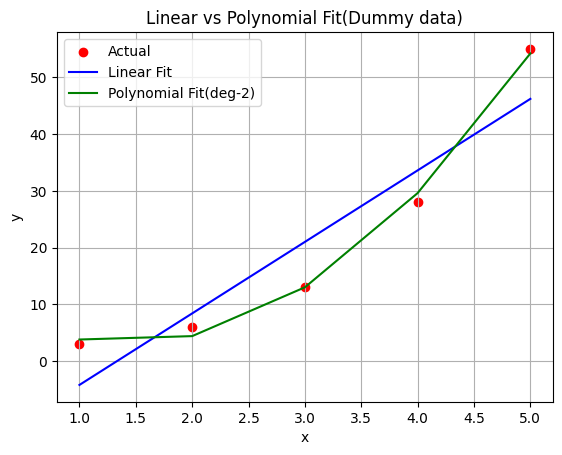

In [ ]:
# Plot

plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred_linear,label='Linear Fit',color='blue')
plt.plot(x,y_pred_poly,label='Polynomial Fit(deg-2)',color='green')
plt.title("Linear vs Polynomial Fit(Dummy data)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Real dataset salary prediction

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
#Load dataset

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


In [ ]:
# Train-test split

x=df[["Years of Experience"]]
y=df["Salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Train linear regression

lin_model=LinearRegression()
lin_model.fit(x_train,y_train)
y_pred_lin=lin_model.predict(x_test)

In [ ]:
# Metrics

mse_lin=mean_squared_error(y_test,y_pred_lin)
rmse_lin=np.sqrt(mse_lin)
r2_lin=r2_score(y_test,y_pred_lin)
print("Linear Regression:")
print("MSE:",mse_lin)
print("RMSE:",rmse_lin)
print("R2 score:",r2_lin)

Linear Regression:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 score: 0.6669549610495003


In [ ]:
# Polynomial Regression
#Degree 2

poly2=PolynomialFeatures(degree=2)
x_train_poly2=poly2.fit_transform(x_train)
x_test_poly2=poly2.transform(x_test)

poly2_model=LinearRegression()
poly2_model.fit(x_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(x_test_poly2)

In [ ]:
x_test_poly2

array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

In [ ]:
x_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [ ]:
# metrics

mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)

In [ ]:
# Degree 4

poly4=PolynomialFeatures(degree=4)
x_train_poly4=poly4.fit_transform(x_train)
x_test_poly4=poly4.transform(x_test)

poly4_model=LinearRegression()
poly4_model.fit(x_train_poly4,y_train)
y_pred_poly4=poly4_model.predict(x_test_poly4)

In [ ]:
x_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [ ]:
x_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [ ]:
mse_poly4=mean_squared_error(y_test,y_pred_poly4)
rmse_poly4=np.sqrt(mse_poly4)
r2_poly4=r2_score(y_test,y_pred_poly4)

print("Polynomial Regression:")
print("Mean squared error:",mse_poly2)
print("Root Mean Squared Error:",rmse_poly2)
print("R-squared score:",r2_poly2)

print("Professional Regression(Degree 4)Metrics:")
print("Mean Squared Error:",mse_poly4)
print("Root Mean Squared Error:",rmse_poly4)
print("R-squared:",r2_poly4)

Polynomial Regression:
Mean squared error: 726857249.7211918
Root Mean Squared Error: 26960.290238074067
R-squared score: 0.7443306732971963
Professional Regression(Degree 4)Metrics:
Mean Squared Error: 720033651.6859531
Root Mean Squared Error: 26833.44278481524
R-squared: 0.7467308484568018


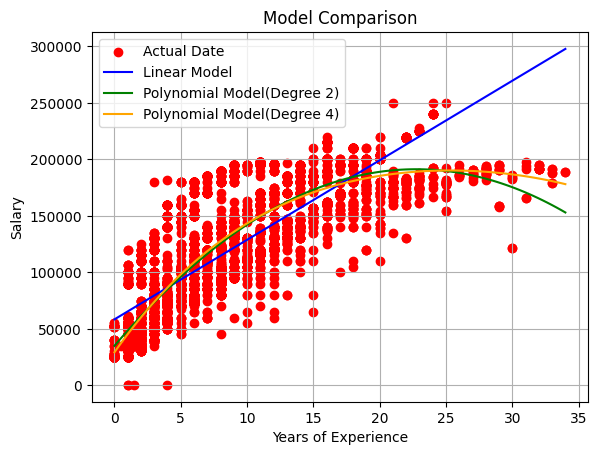

In [ ]:
#Visualization of all model

x_range=np.linspace(x.min(),x.max(),100).reshape(-1,1)

#create dataframe with column name
x_range_df=pd.DataFrame(x_range,columns=["Years of Experience"])

# Transform using polynomial features
x_range_poly2=poly2.transform(x_range_df)
x_range_poly4=poly4.transform(x_range_df)

# Predict using models

y_range_lin=lin_model.predict(x_range_df)
y_range_poly2=poly2_model.predict(x_range_poly2)
y_range_poly4=poly4_model.predict(x_range_poly4)

#Plot

plt.scatter(x,y,color='red',label='Actual Date')
plt.plot(x_range,y_range_lin,label='Linear Model',color='blue')
plt.plot(x_range,y_range_poly2,label='Polynomial Model(Degree 2)',color='green')
plt.plot(x_range,y_range_poly4,label='Polynomial Model(Degree 4)',color='orange')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Model Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model performance camparison

metrics_df=pd.DataFrame({
    "Model":["Linear Regression","Polynomial(Degree 2)","Polynomial(Degree 4)"],
    "MSE":[mse_lin,mse_poly2,mse_poly4],
    "RMSE":[rmse_lin,rmse_poly2,rmse_poly4],
    "R2 Score":[r2_lin,r2_poly2,r2_poly4]
})

metrics_df.style.format({
    "MSE":"{:.2f}",
    "RMSE":"{:.2f}",
    "R2 Score":"{:.4f}"
})

,Model,MSE,RMSE,R2 Score
0,Linear Regression,946833177.71,30770.65,0.6670
1,Polynomial(Degree 2),726857249.72,26960.29,0.7443
2,Polynomial(Degree 4),720033651.69,26833.44,0.7467
